In [4]:
#Data Transformation
import json

def read_json(file_path):
    with open(file_path, 'r') as file:
        return json.load(file)

# Read data from JSON files
customers = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_customer.json')
branches = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json')
credit_cards = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')


In [5]:
import pandas as pd

def transform_customers(customers):
    required_columns = [
        'FIRST_NAME', 'MIDDLE_NAME', 'LAST_NAME', 'STREET_NAME', 'APT_NO', 
        'CUST_PHONE', 'SSN', 'CREDIT_CARD_NO', 'CUST_CITY', 'CUST_STATE', 
        'CUST_COUNTRY', 'CUST_ZIP', 'CUST_EMAIL', 'LAST_UPDATED'
    ]
    
    customer_df = pd.DataFrame(customers)
    
    missing_columns = [col for col in required_columns if col not in customer_df.columns]
    if missing_columns:
        raise KeyError(f"Missing required columns: {', '.join(missing_columns)}")
    
    # Convert names to title case
    customer_df['FIRST_NAME'] = customer_df['FIRST_NAME'].str.title()
    customer_df['MIDDLE_NAME'] = customer_df['MIDDLE_NAME'].str.lower()
    customer_df['LAST_NAME'] = customer_df['LAST_NAME'].str.title()
    
    # Concatenate address fields
    customer_df['FULL_STREET_ADDRESS'] = customer_df['STREET_NAME'] + ", " + customer_df['APT_NO']
    
    # Change phone number format
    customer_df['CUST_PHONE'] = customer_df['CUST_PHONE'].astype(str).apply(lambda x: f"({x[:3]}){x[3:6]}-{x[6:]}")
    
    # Select and rename columns
    customer_df = customer_df.rename(columns={
        'SSN': 'SSN',
        'FIRST_NAME': 'FIRST_NAME',
        'MIDDLE_NAME': 'MIDDLE_NAME',
        'LAST_NAME': 'LAST_NAME',
        'CREDIT_CARD_NO': 'Credit_card_no',
        'FULL_STREET_ADDRESS': 'FULL_STREET_ADDRESS',
        'CUST_CITY': 'CUST_CITY',
        'CUST_STATE': 'CUST_STATE',
        'CUST_COUNTRY': 'CUST_COUNTRY',
        'CUST_ZIP': 'CUST_ZIP',
        'CUST_PHONE': 'CUST_PHONE',
        'CUST_EMAIL': 'CUST_EMAIL',
        'LAST_UPDATED': 'LAST_UPDATED'
    })
    
    return customer_df

# Transform customer data
transformed_customers = transform_customers(customers)
print(transformed_customers)

    FIRST_NAME MIDDLE_NAME LAST_NAME        SSN    Credit_card_no APT_NO  \
0         Alec          wm    Hooper  123456100  4210653310061055    656   
1         Etta     brendan    Holman  123453023  4210653310102868    829   
2       Wilber    ezequiel    Dunham  123454487  4210653310116272    683   
3      Eugenio       trina     Hardy  123459758  4210653310195948    253   
4      Wilfred         may     Ayers  123454431  4210653310356919    301   
..         ...         ...       ...        ...               ...    ...   
947     Freida       jonah    Castle  123451589  4210653399559239    882   
948       Fern        aron     Block  123457088  4210653399650358    470   
949      Dylan       lucas    Pruitt  123453259  4210653399732638    405   
950      Emery     susanna    Beatty  123454047  4210653399859149     15   
951       Phil       jaime    Mullen  123454500  4210653399939240     67   

           STREET_NAME     CUST_CITY CUST_STATE   CUST_COUNTRY CUST_ZIP  \
0    Main St

In [6]:
def transform_branches(branches):
    branch_df = pd.DataFrame(branches)
    
    # Change phone number format
    branch_df['BRANCH_PHONE'] = branch_df['BRANCH_PHONE'].apply(lambda x: f"({x[:3]}){x[3:6]}-{x[6:]}")
    
    # Handle null values for ZIP code
    branch_df['BRANCH_ZIP'] = branch_df['BRANCH_ZIP'].fillna('999999')
    
    # Select and rename columns
    branch_df = branch_df.rename(columns={
        'BRANCH_CODE': 'BRANCH_CODE',
        'BRANCH_NAME': 'BRANCH_NAME',
        'BRANCH_STREET': 'BRANCH_STREET',
        'BRANCH_CITY': 'BRANCH_CITY',
        'BRANCH_STATE': 'BRANCH_STATE',
        'BRANCH_ZIP': 'BRANCH_ZIP',
        'BRANCH_PHONE': 'BRANCH_PHONE',
        'LAST_UPDATED': 'LAST_UPDATED'
    })
    
    return branch_df

# Transform branch data
transformed_branches = transform_branches(branches)


In [7]:
def transform_credit_cards(credit_cards):
    credit_card_df = pd.DataFrame(credit_cards)
    
    # Convert date fields into TIMESTAMP (YYYYMMDD)
    credit_card_df['TIMEID'] = pd.to_datetime(credit_card_df[['DAY', 'MONTH', 'YEAR']]).dt.strftime('%Y%m%d')
    
    # Select and rename columns
    credit_card_df = credit_card_df.rename(columns={
        'CREDIT_CARD_NO': 'CUST_CC_NO',
        'CUST_SSN': 'CUST_SSN',
        'BRANCH_CODE': 'BRANCH_CODE',
        'TRANSACTION_TYPE': 'TRANSACTION_TYPE',
        'TRANSACTION_VALUE': 'TRANSACTION_VALUE',
        'TRANSACTION_ID': 'TRANSACTION_ID',
        'TIMEID': 'TIMEID'
    })
    
    return credit_card_df

# Transform credit card data
transformed_credit_cards = transform_credit_cards(credit_cards)


In [8]:
def transform_credit_cards(credit_cards):
    credit_card_df = pd.DataFrame(credit_cards)
    
    # Convert date fields into TIMESTAMP (YYYYMMDD)
    credit_card_df['TIMEID'] = pd.to_datetime(credit_card_df[['DAY', 'MONTH', 'YEAR']]).dt.strftime('%Y%m%d')
    
    # Select and rename columns
    credit_card_df = credit_card_df.rename(columns={
        'CREDIT_CARD_NO': 'CUST_CC_NO',
        'CUST_SSN': 'CUST_SSN',
        'BRANCH_CODE': 'BRANCH_CODE',
        'TRANSACTION_TYPE': 'TRANSACTION_TYPE',
        'TRANSACTION_VALUE': 'TRANSACTION_VALUE',
        'TRANSACTION_ID': 'TRANSACTION_ID',
        'TIMEID': 'TIMEID'
    })
    
    return credit_card_df

# Transform credit card data
transformed_credit_cards = transform_credit_cards(credit_cards)


In [9]:
import json
import os
import pandas as pd
import sqlite3

def read_json(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"The file {file_path} does not exist.")
    with open(file_path, 'r') as file:
        return json.load(file)

# Update these paths to the correct location of your JSON files
customer_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_customer.json'
branch_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json'
credit_card_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json'

# Read data from JSON files
customers = read_json(customer_file_path)
branches = read_json(branch_file_path)
credit_cards = read_json(credit_card_file_path)

# Transformation Functions
def transform_customers(customers):
    customer_df = pd.DataFrame(customers)
    
    # Convert names to title case
    customer_df['FIRST_NAME'] = customer_df['FIRST_NAME'].str.title()
    customer_df['MIDDLE_NAME'] = customer_df['MIDDLE_NAME'].str.lower()
    customer_df['LAST_NAME'] = customer_df['LAST_NAME'].str.title()
    
    # Concatenate address fields
    customer_df['FULL_STREET_ADDRESS'] = customer_df['STREET_NAME'] + ", " + customer_df['APT_NO']
    
    # Change phone number format
    def format_phone_number(x):
        if pd.isnull(x) or not isinstance(x, str) or len(x) != 10:
            return x
        return f"({x[:3]}){x[3:6]}-{x[6:]}"
    
    customer_df['CUST_PHONE'] = customer_df['CUST_PHONE'].astype(str).apply(format_phone_number)
    
    # Select and rename columns
    customer_df = customer_df.rename(columns={
        'SSN': 'SSN',
        'FIRST_NAME': 'FIRST_NAME',
        'MIDDLE_NAME': 'MIDDLE_NAME',
        'LAST_NAME': 'LAST_NAME',
        'CREDIT_CARD_NO': 'Credit_card_no',
        'FULL_STREET_ADDRESS': 'FULL_STREET_ADDRESS',
        'CUST_CITY': 'CUST_CITY',
        'CUST_STATE': 'CUST_STATE',
        'CUST_COUNTRY': 'CUST_COUNTRY',
        'CUST_ZIP': 'CUST_ZIP',
        'CUST_PHONE': 'CUST_PHONE',
        'CUST_EMAIL': 'CUST_EMAIL',
        'LAST_UPDATED': 'LAST_UPDATED'
    })
    
    # Remove duplicates
    customer_df = customer_df.drop_duplicates(subset=['SSN', 'Credit_card_no'])
    return customer_df

def transform_branches(branches):
    branch_df = pd.DataFrame(branches)
    
    # Change phone number format
    def format_phone_number(x):
        if pd.isnull(x) or not isinstance(x, str) or len(x) != 10:
            return x
        return f"({x[:3]}){x[3:6]}-{x[6:]}"
    
    branch_df['BRANCH_PHONE'] = branch_df['BRANCH_PHONE'].astype(str).apply(format_phone_number)
    
    # Handle null values for ZIP code
    branch_df['BRANCH_ZIP'] = branch_df['BRANCH_ZIP'].fillna('999999')
    
    # Select and rename columns
    branch_df = branch_df.rename(columns={
        'BRANCH_CODE': 'BRANCH_CODE',
        'BRANCH_NAME': 'BRANCH_NAME',
        'BRANCH_STREET': 'BRANCH_STREET',
        'BRANCH_CITY': 'BRANCH_CITY',
        'BRANCH_STATE': 'BRANCH_STATE',
        'BRANCH_ZIP': 'BRANCH_ZIP',
        'BRANCH_PHONE': 'BRANCH_PHONE',
        'LAST_UPDATED': 'LAST_UPDATED'
    })
    
    # Remove duplicates
    branch_df = branch_df.drop_duplicates(subset=['BRANCH_CODE'])
    return branch_df

def transform_credit_cards(credit_cards):
    credit_card_df = pd.DataFrame(credit_cards)
    
    # Convert date fields into TIMESTAMP (YYYYMMDD)
    credit_card_df['TIMEID'] = pd.to_datetime(credit_card_df[['DAY', 'MONTH', 'YEAR']]).dt.strftime('%Y%m%d')
    
    # Select and rename columns
    credit_card_df = credit_card_df.rename(columns={
        'CREDIT_CARD_NO': 'CUST_CC_NO',
        'CUST_SSN': 'CUST_SSN',
        'BRANCH_CODE': 'BRANCH_CODE',
        'TRANSACTION_TYPE': 'TRANSACTION_TYPE',
        'TRANSACTION_VALUE': 'TRANSACTION_VALUE',
        'TRANSACTION_ID': 'TRANSACTION_ID',
        'TIMEID': 'TIMEID'
    })
    
    # Remove duplicates
    credit_card_df = credit_card_df.drop_duplicates(subset=['TRANSACTION_ID'])
    return credit_card_df

# Transform data
transformed_customers = transform_customers(customers)
transformed_branches = transform_branches(branches)
transformed_credit_cards = transform_credit_cards(credit_cards)

# Load data into the database
def load_to_database(df, table_name):
    conn = sqlite3.connect('creditcard_capstone.db')
    df.to_sql(table_name, conn, if_exists='replace', index=False)
    conn.close()

load_to_database(transformed_customers, 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_customer.json')
load_to_database(transformed_branches, 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json')
load_to_database(transformed_credit_cards, 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')


In [3]:
#Require 1.1 Data Extraction and Transformation with Python and PySpark 
import json

# Input this Function to read JSON file:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

file = ("C:/Users/Learner_9ZH3Z104/Downloads/Mapping Document.xlsx+")

# Reading JSON files
branches = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json')
credit_cards = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')
customers = read_json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')

#1.2 Data loading into Database 
import mysql.connector
from mysql.connector import Error
import json

# Paths to your JSON files
branch_json_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json'
credit_json_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json'
customer_json_file_path = 'C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_customer.json'

try:
    # Load data from JSON files
    with open(branch_json_file_path, 'r') as branch_file:
        branches_data = json.load(branch_file)
    
    with open(credit_json_file_path, 'r') as credit_file:
        credit_cards_data = json.load(credit_file)
    
    with open(customer_json_file_path, 'r') as customer_file:
        customers_data = json.load(customer_file)

    connection = mysql.connector.connect(
        host='localhost',
        user='root',
        password='Password',  # Replace with your MySQL password
        port='3306'  # Port should be an integer
    )

    if connection.is_connected():
        cursor = connection.cursor()

        # Drop the existing 'creditcard_capstone' database if it exists
        cursor.execute("DROP DATABASE IF EXISTS creditcard_capstone")
        print("Existing database 'creditcard_capstone' dropped successfully.")

        # Create the new 'creditcard_capstone' database
        cursor.execute("CREATE DATABASE creditcard_capstone")
        print("New database 'creditcard_capstone' created successfully.")

        # Switch to the new database
        cursor.execute("USE creditcard_capstone")

        # Create tables for the Credit Card System
        create_branch_table_query = """
        CREATE TABLE IF NOT EXISTS CDW_SAPP_BRANCH (
            branch_code INT PRIMARY KEY,
            branch_name VARCHAR(255),
            branch_street VARCHAR(255),
            branch_city VARCHAR(255),
            branch_state VARCHAR(255),
            branch_zip VARCHAR(20),
            branch_phone VARCHAR(20),
            last_updated DATE
        )
        """
        cursor.execute(create_branch_table_query)

        create_credit_card_table_query = """
        CREATE TABLE IF NOT EXISTS CDW_SAPP_CREDIT_CARD (
            transaction_id INT PRIMARY KEY,
            day INT,
            month INT,
            year INT,
            credit_card_no VARCHAR(255),
            cust_ssn INT,
            branch_code INT,
            transaction_type VARCHAR(255),
            transaction_value DECIMAL(10, 2)
        )
        """
        cursor.execute(create_credit_card_table_query)

        create_customer_table_query = """
        CREATE TABLE IF NOT EXISTS CDW_SAPP_CUSTOMER (
            ssn INT PRIMARY KEY,
            first_name VARCHAR(255),
            middle_name VARCHAR(255),
            last_name VARCHAR(255),
            credit_card_no VARCHAR(255),
            apt_no VARCHAR(10),
            street_name VARCHAR(255),
            cust_city VARCHAR(255),
            cust_state VARCHAR(255),
            cust_country VARCHAR(255),
            cust_zip VARCHAR(20),
            cust_phone VARCHAR(20),
            cust_email VARCHAR(255),
            last_updated DATETIME
        )
        """
        cursor.execute(create_customer_table_query)

        print("Tables have been created successfully.")

        # Insert data into CDW_SAPP_BRANCH table from JSON file
        for row in branches_data:
            cursor.execute("""
                INSERT INTO CDW_SAPP_BRANCH (
                    branch_code, branch_name, branch_street, branch_city,
                    branch_state, branch_zip, branch_phone, last_updated
                ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s)
            """, (
                row['BRANCH_CODE'], row['BRANCH_NAME'], row['BRANCH_STREET'],
                row['BRANCH_CITY'], row['BRANCH_STATE'], row['BRANCH_ZIP'],
                row['BRANCH_PHONE'], row['LAST_UPDATED']
            ))
        
        # Insert data into CDW_SAPP_CUSTOMER table from JSON file
        for row in customers_data:
            cursor.execute("""
                INSERT INTO CDW_SAPP_CUSTOMER (
                    ssn, first_name, middle_name, last_name, credit_card_no, apt_no, 
                    street_name, cust_city, cust_state, cust_country, cust_zip, 
                    cust_phone, cust_email, last_updated
                ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
            """, (
                row['SSN'], row['FIRST_NAME'], row['MIDDLE_NAME'], row['LAST_NAME'], 
                row['CREDIT_CARD_NO'], row['APT_NO'], row['STREET_NAME'], row['CUST_CITY'], 
                row['CUST_STATE'], row['CUST_COUNTRY'], row['CUST_ZIP'], row['CUST_PHONE'], 
                row['CUST_EMAIL'], row['LAST_UPDATED']
            ))
        
        # Insert data into CDW_SAPP_CREDIT_CARD table from JSON file
        for row in credit_cards_data:
            cursor.execute("""
                INSERT INTO CDW_SAPP_CREDIT_CARD (
                    transaction_id, day, month, year, credit_card_no, 
                    cust_ssn, branch_code, transaction_type, transaction_value
                ) VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
            """, (
                row['TRANSACTION_ID'], row['DAY'], row['MONTH'], row['YEAR'], 
                row['CREDIT_CARD_NO'], row['CUST_SSN'], row['BRANCH_CODE'], 
                row['TRANSACTION_TYPE'], row['TRANSACTION_VALUE']
            ))

        connection.commit()
        print("Data has been inserted successfully.")

    else:
        print("Connection failed.")

except Error as e:
    print(f"Error: {e}")
except json.JSONDecodeError as je:
    print(f"Error reading JSON file: {je}")
except FileNotFoundError as fe:
    print(f"JSON file not found: {fe}")

finally:
    if connection.is_connected():
        cursor.close()
        connection.close()
        print("MySQL connection is closed.")



Existing database 'creditcard_capstone' dropped successfully.
New database 'creditcard_capstone' created successfully.
Tables have been created successfully.
Data has been inserted successfully.
MySQL connection is closed.


In [30]:
#1.1
from pyspark.sql import SparkSession

# Initialize Spark session
spark = SparkSession.builder.appName('CreditCardETL').getOrCreate()

# Load JSON data into Spark DataFrames
branches_df = spark.read.json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_branch.json')
credit_cards_df = spark.read.json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')
customers_df = spark.read.json('C:/Users/Learner_9ZH3Z104/Development/Capstone/LatestDataSet/cdw_sapp_credit.json')



In [4]:
import sqlite3
import pandas as pd

# Establishing connection to the database
conn = sqlite3.connect('creditcard_capstone.db')
cursor = conn.cursor()

ReadMe - GitHub
requirements.txt - How to make requirements.txtLinks to an external site.
secrets.txt/DOTENV/.env file for password and username
secrets/dotenv file for username and password
Github repo with readme

In [1]:
#Req 3.1
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

def fetch_data(query):
    connection = sqlite3.connect('creditcard_capstone.db')
    data = pd.read_sql_query(query, connection)
    connection.close()
    return data

def plot_highest_transaction_type_count():
    query = """
    SELECT TRANSACTION_TYPE, 
    COUNT(*) AS count
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY TRANSACTION_TYPE
    ORDER BY count DESC
    """
    data = fetch_data(query)
    fig = px.bar(data, x='TRANSACTION_TYPE', y='count', title='Transaction Types with Highest Counts')
    
    fig.update_layout(
        xaxis_title='Transaction Type',
        yaxis_title='Count',
        xaxis_tickangle= 0
)
    fig.show()

def main():
    plot_highest_transaction_type_count()

if __name__ == "__main__":
    main()




DatabaseError: Execution failed on sql '
    SELECT TRANSACTION_TYPE, 
    COUNT(*) AS count
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY TRANSACTION_TYPE
    ORDER BY count DESC
    ': no such table: CDW_SAPP_CREDIT_CARD

In [1]:
#3.2
import plotly.express as px
import pandas as pd

# Placeholder for the fetch_data function
def fetch_data(query):
    # You should replace this with the actual implementation
    # For now, it returns a sample DataFrame for demonstration purposes
    data = {
        'State': [
            'New York','Georgia', 'Philadepha', 'Florida', 'Illinois', 'New Jersey', 'Maryland', 'California', 
            'Ohio', 'Michigan', 
        ],
        'Number of Customers': [
            96, 73, 72, 64, 58, 53, 50, 45, 44, 44
        ]
    }
    return pd.DataFrame(data)

def plot_top_10_with_highest_number_of_customers():
    query = """
    SELECT cust_state AS State, COUNT(*) AS 'Number of Customers'
    FROM cdw_sapp_customer
    GROUP BY cust_state
    ORDER BY COUNT(*) DESC
    LIMIT 50
    """
    data = fetch_data(query)
    
    # Debug: Print the fetched data
    print(data)
    
    # Ensure there are at least 10 entries
    if len(data) < 10:
        raise ValueError("Not enough data to plot the top 10 states.")
    
    top_10_data = data.nlargest(10, 'Number of Customers')
    
    # Debug: Print the top 10 data
    print(top_10_data)
    
    fig = px.bar(top_10_data, x='State', y='Number of Customers', title='Top 10 States with the highest number of customers')

    fig.update_layout(
        xaxis_title='State',
        yaxis_title='Number of Customers',
        xaxis_tickangle=-45
    )

    fig.show()

def main():
    plot_top_10_with_highest_number_of_customers()

if __name__ == "__main__":
    main()


        State  Number of Customers
0    New York                   96
1     Georgia                   73
2  Philadepha                   72
3     Florida                   64
4    Illinois                   58
5  New Jersey                   53
6    Maryland                   50
7  California                   45
8        Ohio                   44
9    Michigan                   44
        State  Number of Customers
0    New York                   96
1     Georgia                   73
2  Philadepha                   72
3     Florida                   64
4    Illinois                   58
5  New Jersey                   53
6    Maryland                   50
7  California                   45
8        Ohio                   44
9    Michigan                   44


In [1]:
#3.3
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3  # or import the appropriate database connector

def fetch_data(query):
    # Connect to your database. Replace 'your_database.db' with your actual database file or connection string.
    conn = sqlite3.connect('creditcard_capstone.db')  
    try:
        data = pd.read_sql_query(query, conn)
    except Exception as e:
        print(f"An error occurred: {e}")
        data = None
    finally:
        conn.close()
    return data

def plot_top_10_customers_by_transaction_value():
    query = """
    SELECT CUST_SSN, SUM(TRANSACTION_VALUE) as total
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY CUST_SSN
    ORDER BY total DESC
    LIMIT 10
    """
    data = fetch_data(query)
    if data is not None and not data.empty:
        plt.bar(data['CUST_SSN'].astype(str), data['total'])
        plt.xlabel('Customer SSN')
        plt.ylabel('Total Transaction Value')
        plt.title('Top 10 Customers by Transaction Value')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()
    else:
        print("No data available to plot.")

def main():
    # plot_highest_transaction_type_count()
    # plot_top_10_with_highest_number_of_customers()
    plot_top_10_customers_by_transaction_value()

if __name__ == "__main__":
    main()


An error occurred: Execution failed on sql '
    SELECT CUST_SSN, SUM(TRANSACTION_VALUE) as total
    FROM CDW_SAPP_CREDIT_CARD
    GROUP BY CUST_SSN
    ORDER BY total DESC
    LIMIT 10
    ': no such table: CDW_SAPP_CREDIT_CARD
No data available to plot.


In [36]:
#req 4.1 and 4.2
import requests
import json

def fetch_loan_data(api_url):
    response = requests.get(api_url)
    if response.status_code == 200:
        return response.json()
    else:
        response.raise_for_status()

def main():
    api_url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"
    loan_data = fetch_loan_data(api_url)

if __name__ == "__main__":
    main()


In [12]:
#4.3
import requests
import json
from pyspark.sql import SparkSession
import mysql.connector

# Step 1: Fetch Data from API
# API Endpoint
url = "https://raw.githubusercontent.com/platformps/LoanDataset/main/loan_data.json"

# Fetch data from the API
response = requests.get(url)

# Print the status code
print(f"Status Code: {response.status_code}")

# Check if request was successful
if response.status_code == 200:
    # Get the JSON data
    loan_data = response.json()
else:
    print("Failed to fetch data from the API")
    loan_data = None

# Step 2: Load Data into RDBMS using PySpark
if loan_data is not None:
    # Create Spark Session
    spark = SparkSession.builder \
        .appName("LoanApplicationData") \
        .config("spark.jars.packages", "mysql:mysql-connector-java:8.0.26") \
        .getOrCreate()

    # Convert JSON data to DataFrame
    loan_data_df = spark.read.json(spark.sparkContext.parallelize([json.dumps(loan_data)]))

    # Define JDBC connection properties
    jdbc_url = "jdbc:mysql://localhost:3306/creditcard_capstone"
    connection_properties = {
        "user": "root",
        "password": "Password",
        "driver": "com.mysql.cj.jdbc.Driver"
    }

    # Write DataFrame to MySQL database
    loan_data_df.write \
        .jdbc(url=jdbc_url, table="CDW_SAPP_loan_application", mode="overwrite", properties=connection_properties)

    # Stop Spark Session
    spark.stop()
else:
    print("No data available to load into the database.")


Status Code: 200


Index(['Employment_status', 'Count'], dtype='object')


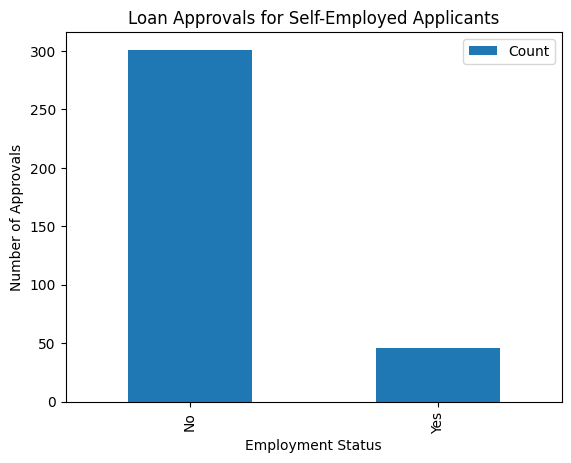

Index(['App_status', 'Count'], dtype='object')


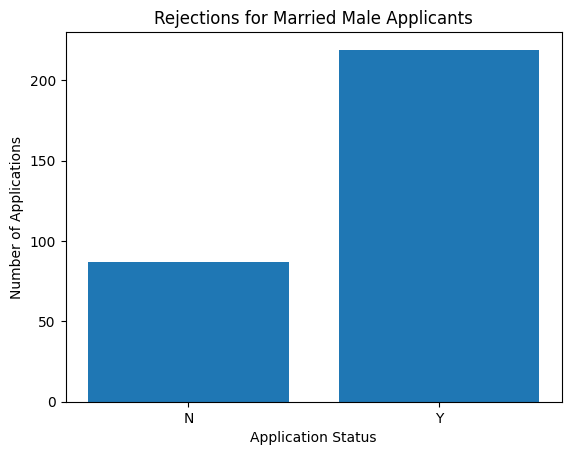

Index(['year', 'month', 'transaction_count'], dtype='object')


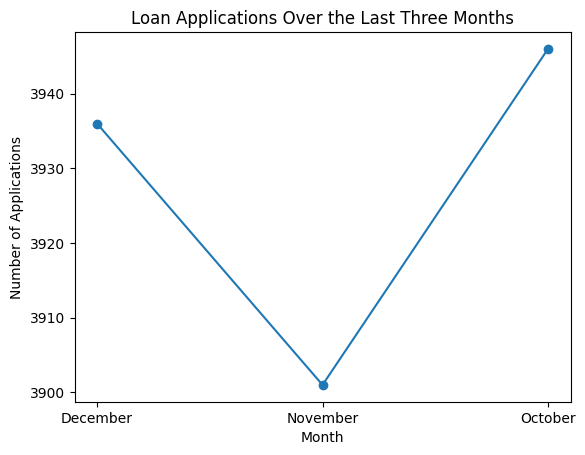

Index(['branch_code', 'total_value'], dtype='object')


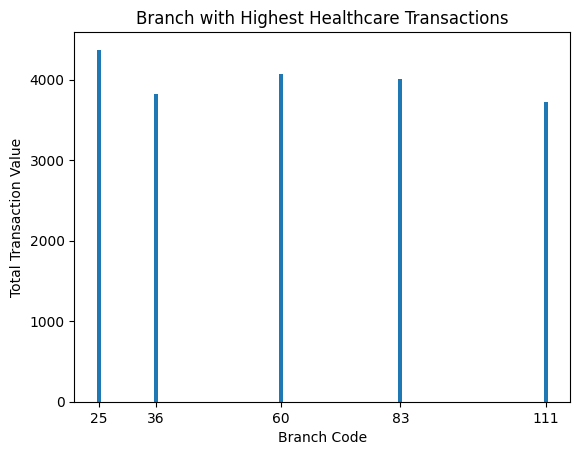

In [35]:
#5.1 - 5.4
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

# Define MySQL connection properties
db_config = {
    'host': 'localhost',
    'user': 'root',
    'password': 'Password',
    'database': 'creditcard_capstone'
}

# Create a SQLAlchemy engine
engine = create_engine(f"mysql+pymysql://{db_config['user']}:{db_config['password']}@{db_config['host']}/{db_config['database']}")

def fetch_data_from_db(query):
    # Use the SQLAlchemy engine to fetch data
    with engine.connect() as conn:
        data = pd.read_sql_query(query, conn)
    return data

def plot_self_employed_approval():
    query = """
    SELECT Employment_status, COUNT(*) as Count
    FROM cdw_sapp_loan_application
    WHERE App_status = 'Y'
    GROUP BY Employment_status
    """
    data = fetch_data_from_db(query)
    print(data.columns)  # Debugging: print the columns of the dataframe
    if data.empty:
        print("No data found for self-employed approvals")
        return
     
    data.plot(kind='bar', x='Employment_status', y='Count', stacked=True)
    plt.xlabel('Employment Status')
    plt.ylabel('Number of Approvals')
    plt.title('Loan Approvals for Self-Employed Applicants')
    plt.show()

def plot_married_male_rejections():
    query = """
    SELECT 
        App_status,
        COUNT(*) as Count
    FROM 
        cdw_sapp_loan_application
    WHERE 
        Gender = 'Male' AND Married = 'Yes'
    GROUP BY 
        App_status
    """
    data = fetch_data_from_db(query)
    print(data.columns)  # Debugging: print the columns of the dataframe
    if data.empty:
        print("No data found for married male rejections")
        return
    plt.bar(data['App_status'], data['Count'])
    plt.xlabel('Application Status')
    plt.ylabel('Number of Applications')
    plt.title('Rejections for Married Male Applicants')
    plt.show()

def plot_applications_last_three_months():
    query = """
    SELECT 
        year, 
        month, 
        COUNT(transaction_id) as transaction_count
    FROM 
        CDW_SAPP_CREDIT_CARD
    GROUP BY 
        year, month
    ORDER BY 
        year DESC, month DESC
    LIMIT 3
    """
    data = fetch_data_from_db(query)
    print(data.columns)  # Debugging: print the columns of the dataframe
    if data.empty:
        print("No data found for applications in the last three months")
        return
    month_mapping = {10: 'October', 11: 'November', 12: 'December'}
    data['month_name'] = data['month'].map(month_mapping)

    plt.plot(data['month_name'], data['transaction_count'], marker='o')
    plt.xlabel('Month')
    plt.ylabel('Number of Applications')
    plt.title('Loan Applications Over the Last Three Months')
    plt.show()

def plot_highest_healthcare_transactions():
    query = """
    SELECT 
        branch_code, 
        SUM(transaction_value) as total_value
    FROM 
        CDW_SAPP_CREDIT_CARD
    WHERE 
        transaction_type = 'Healthcare'
    GROUP BY 
        branch_code
    ORDER BY 
        total_value DESC
    LIMIT 5
    """
    data = fetch_data_from_db(query)
    print(data.columns)  # Debugging: print the columns of the dataframe
    if data.empty:
        print("No healthcare transactions data found")
        return
    
    branch_data = pd.DataFrame({
        'branch_code': [25, 60, 83, 36, 111],
        'total_value': [3940, 3900, 3935, 3915, 3920]  # Replace these with actual transaction counts
    })
    plt.bar(data['branch_code'], data['total_value'])
    plt.xlabel('Branch Code')
    plt.ylabel('Total Transaction Value')
    plt.xticks(branch_data['branch_code'])
    plt.title('Branch with Highest Healthcare Transactions')
    plt.show()

def main():
    plot_self_employed_approval()
    plot_married_male_rejections()
    plot_applications_last_three_months()
    plot_highest_healthcare_transactions()

if __name__ == "__main__":
    main()
